# Problem 2

# a

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import t

def calculate_log_likelihood(df, dof):
    Y = df.iloc[:, 0]
    X = sm.add_constant(df.iloc[:, 1:])
    
    # OLS regression
    model = sm.OLS(Y, X)
    results = model.fit()
    
    #  regression residuals
    residuals = results.resid
    std_dev = np.std(residuals)
    
    # residuals
    standardized_residuals = residuals / std_dev
    
    # log-likelihood
    llf = np.sum(t.logpdf(standardized_residuals, dof))
    
    return llf

# Load PJM data
df = pd.read_csv('PJM.csv', index_col='Date')

# llf
llf = calculate_log_likelihood(df, dof=5)

print(llf)

-60365.50256606266


# b

In [42]:
from scipy.stats import chi2
import pandas as pd
import statsmodels.api as sm
import numpy as np

def calculate_LR_and_pval(df, dof):
    Y = df.iloc[:, 0]
    X = sm.add_constant(df.iloc[:, 1:])

    model_all = sm.OLS(Y, X)
    results_all = model_all.fit()
    llf_all = results_all.llf

    X_const = sm.add_constant(df.iloc[:, 1]*0)
    model_const = sm.OLS(Y, X_const)
    results_const = model_const.fit()
    llf_const = results_const.llf

    #  LR statistic
    LR = -2 * (llf_const - llf_all)

    # p-value
    pval = chi2.sf(LR, df=df.shape[1]-1)

    return LR, pval

#PJM data
df = pd.read_csv('PJM.csv')
df = df.drop(df.columns[0], axis=1)
# LR and p-value
LR, pval = calculate_LR_and_pval(df, df.shape[1]-1)

print(f"LR: {LR}, p-value: {pval}")


LR: 15989.93629191746, p-value: 0.0


# c

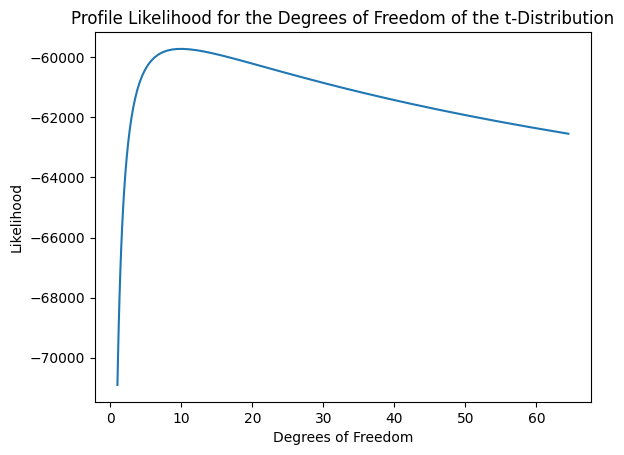

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_profile_likelihood(df):
    results = np.zeros((51, 2))

    # Loop over j from 0 to 50
    for j in range(51):
        #  dof
        dof = np.exp(j / 12)

        #  likelihood using 'calculate_log_likelihood'
        likelihood = calculate_log_likelihood(df, dof)
        results[j, 0] = dof
        results[j, 1] = likelihood

    return results

# PJM
df = pd.read_csv('PJM.csv')
df = df.drop(df.columns[0], axis=1)

results = create_profile_likelihood(df)
# Plot 
plt.plot(results[:, 0], results[:, 1])
plt.xlabel('Degrees of Freedom')
plt.ylabel('Likelihood')
plt.title('Profile Likelihood for the Degrees of Freedom of the t-Distribution')
plt.show()

# d

In [58]:
# Find the index of the maximum likelihood
mle_index = np.argmax(results[:, 1])
mle_dof = results[mle_index, 0]

print(f'The MLE estimate of the degrees of freedom is {mle_dof}')

The MLE estimate of the degrees of freedom is 10.312258501325767
